So we have from the previous two notebooks finally useful measurements from this whole horid procedure. Here we take these measurements and turn them into useful graphs showing the serpentinite and carbonate flux at ridges and trenches through time.

I show here snapshots comparing the approaches (PMSR vs. POSR for both serpentinite and inorganic carbon). This also includes a measure of water content in serpentinite (13 wt%). It could be done for basalt content as well quite easily to get a bigger estimate (or implementing a procedure for pore and structural water after Jarrard 2003 for eexample).

References

Jarrard, R.D., 2003. Subduction fluxes of water, carbon dioxide, chlorine, and potassium. Geochemistry, Geophysics, Geosystems, 4(5).

Merdith, A.S., Atkins, S.E. and Tetley, M.G., 2019. Tectonic controls on carbon and serpentinite storage in subducted upper oceanic lithosphere for the past 320 Ma. Frontiers in Earth Science, 7, p.332.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from scipy import interpolate
import collections
import ScientificColourMaps5 as SCM5
import matplotlib.patches as mpatches

/Users/Andrew/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1066: UserWarning: Duplicate key in file "/Users/Andrew/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/Andrew/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1066: UserWarning: Duplicate key in file "/Users/Andrew/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [4]:
datadir = '/Users/Andrew/Documents/PhD/Scripts/Python_Scripts/pyGPlates_examples/Merdith_2019_Frontiers/Sample_Data/'
loaddir = '/Users/Andrew/Documents/PhD/Scripts/Python_Scripts/pyGPlates_examples/Merdith_2019_Frontiers/output/results/'
savedir = '/Users/Andrew/Documents/PhD/Scripts/Python_Scripts/pyGPlates_examples/Merdith_2019_Frontiers/output/figs/'

times = np.arange(0,201,1)

#load carbon data and trim/sort
df_CO2 = pd.read_csv('%sncomms14845-compiled.csv' % datadir)


#density carbon g/cm3
carbon_density = 2.26
carbon_densitygkm3 = float(carbon_density * 100000**3)
C_MT_a = carbon_densitygkm3/1000/1000000000/1000000
#density serpentinites g/cm3
serpentinites_density = 3.00 #ranges between 2.7-3.3
serpentinites_densitygkm3 = float(serpentinites_density * 100000**3)
S_MT_a = serpentinites_densitygkm3/1000/1000000000/1000000


In [5]:
serp_results_data_dict = collections.defaultdict(list)
water_results_data_dict = collections.defaultdict(list)
models = ['Serp_SUB_PMSR_batch','Serp_MOR_PMSR_batch','Serp_SUB_POSR_batch','Serp_MOR_POSR_batch']

for model in models:
    serp_results_data_dict[model] = np.asarray(pd.read_csv('%s%s.csv' % (loaddir, model), index_col=None, header=None, sep=','))*S_MT_a

water_results_data_dict['H2O_MOR_PMSR'] = serp_results_data_dict['Serp_MOR_PMSR_batch'] * 0.13
water_results_data_dict['H2O_SUB_PMSR'] = serp_results_data_dict['Serp_SUB_PMSR_batch'] * 0.13
water_results_data_dict['H2O_MOR_POSR'] = serp_results_data_dict['Serp_MOR_POSR_batch'] * 0.13
water_results_data_dict['H2O_SUB_POSR'] = serp_results_data_dict['Serp_SUB_POSR_batch'] * 0.13

#update list of models
serp_models = serp_results_data_dict.keys()
water_models = water_results_data_dict.keys()

In [6]:
serp_results_data_dict.keys()[0]

'Serp_SUB_PMSR_batch'

In [7]:
colour_scheme = []
cmap = SCM5.batlow    # PiYG
#color_models = ['','Serp_PMSR', 'H2O_MOR_PMSR','Serp_PMSR', 'H2O_PMSR']
serp_colors = cmap(np.linspace(0, 1, len(serp_models)))
water_colors = cmap(np.linspace(0, 1, len(water_models)))

In [8]:
def running_mean(x, N, mode):
    
    '''
    uses np.convolve to return a running mean.
    X: 1D array or list of values to compute running mean
    N: window size of running mean
    mode: valid, full or same (see https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
    for an example of the difference). I default to 'valid'.
    '''
    #x = np.pad(x, (0, N // 2), mode='constant', constant_values = np.nan)
    return np.convolve(x, np.ones((N,))/N, mode=mode)

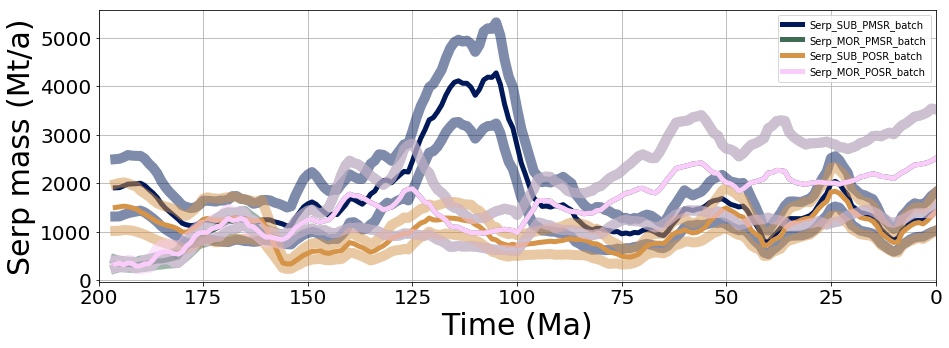

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
for ind, model in enumerate(serp_models):
    
    ax.plot(running_mean(serp_results_data_dict[model].mean(axis=1), 5, 'valid'),
            color=serp_colors[ind], lw=5, alpha=1, label=model)
    ax.plot(running_mean(serp_results_data_dict[model].mean(axis=1), 5, 'valid')+running_mean(serp_results_data_dict[model].std(axis=1), 5, 'valid'),
                    color=serp_colors[ind], lw=10, alpha=0.5)
    ax.plot(running_mean(serp_results_data_dict[model].mean(axis=1), 5, 'valid')-running_mean(serp_results_data_dict[model].std(axis=1), 5, 'valid'),        
                    color=serp_colors[ind], lw=10, alpha=0.5)
ax.set_xlim(200,0)
ax.set_xlabel('Time (Ma)', fontsize=30)
ax.set_ylabel('Serp mass (Mt/a)', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend()
ax.grid()



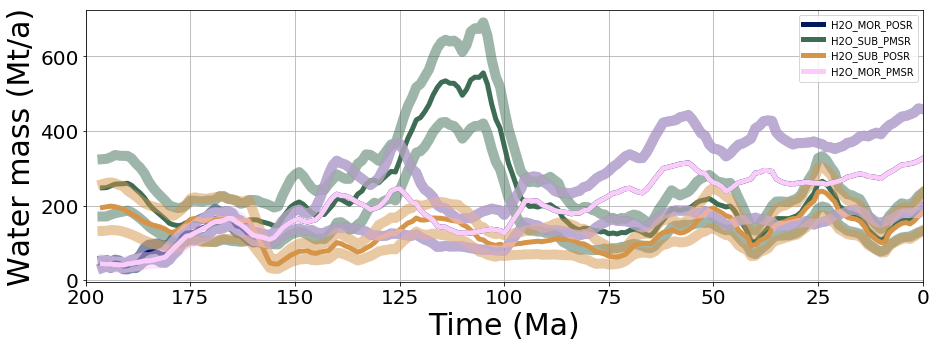

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
for ind, model in enumerate(water_models):
    ax.plot(running_mean(water_results_data_dict[model].mean(axis=1), 5, 'valid'),
            color=serp_colors[ind],
            lw=5, alpha=1, label=model)
    ax.plot(running_mean(water_results_data_dict[model].mean(axis=1), 5, 'valid')+running_mean(water_results_data_dict[model].std(axis=1), 5, 'valid'),
            color=serp_colors[ind],
            lw=10, alpha=0.5)
    ax.plot(running_mean(water_results_data_dict[model].mean(axis=1), 5, 'valid')-running_mean(water_results_data_dict[model].std(axis=1), 5, 'valid'),        
            color=serp_colors[ind],
            lw=10, alpha=0.5)

        #ax.plot(results_data_dict[model][5], lw=10, alpha=0.5,color=colors[ind], label=model)
ax.set_xlim(200,0)
ax.set_xlabel('Time (Ma)', fontsize=30)
ax.set_ylabel('Water mass (Mt/a)', fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend()
ax.grid()

